## 練習問題 (A)

### A-1

非負の整数しか出てこないため`signed`は結果に影響を与えない。

### A-2

バイナリデータを読み込む際の順番に影響し、`big`では上から順にそのまま、`little`では逆順にデータを読み込む。

そのため、下記のようにbyteorderを変えると同時にビットの順番を逆順にすれば同じ結果を出力する。

In [2]:
b = b'\x00\x00\x08\x03'
print(" int: ", int.from_bytes(b, byteorder="big", signed=True))

b = b'\x03\x08\x00\x00'
print(" int: ", int.from_bytes(b, byteorder="little", signed=True))

 int:  2051
 int:  2051


### A-3

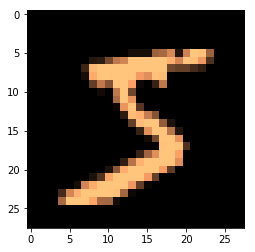

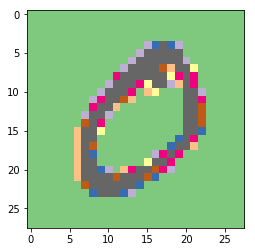

Successfully closed.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

toread = "data/MNIST/train-images-idx3-ubyte"

f_bin = open(toread, mode="rb")

f_bin.seek(4*4)

n = 60000 # (anticipated) number of images.
d = 28*28 # number of entries (int values) per image.
cmap_list = [plt.cm.copper, plt.cm.Accent]
bytes_left = d
data_x = np.zeros((d,), dtype=np.uint8) # initialize.

for cmap in cmap_list:

    idx = 0
    while idx < bytes_left:
        # Iterate one byte at a time.
        b = f_bin.read(1)
        data_x[idx] = int.from_bytes(b, byteorder="big", signed=False)
        idx += 1

    img_x = data_x.reshape( (28,28) ) # populate one row at a time.
    
    plt.imshow(img_x, cmap=cmap)
    plt.show()


f_bin.close()
if f_bin.closed:
    print("Successfully closed.")

### A-4

In [4]:
def save_images(is_train):

    toread = "data/MNIST/train-images-idx3-ubyte" if is_train else "data/MNIST/t10k-images-idx3-ubyte"

    f_bin = open(toread, mode="rb")

    f_bin.seek(4*4)

    n = 60000 if is_train else 10000
    d = 28*28
    times_todo = 10
    bytes_left = d
    data_x = np.zeros((d,), dtype=np.uint8) # initialize.

    prefix = "MNIST_train_" if is_train else "MNIST_test_"
    
    for t in range(times_todo):

        idx = 0
        while idx < bytes_left:
            # Iterate one byte at a time.
            b = f_bin.read(1)
            data_x[idx] = int.from_bytes(b, byteorder="big", signed=False)
            idx += 1

        img_x = data_x.reshape( (28,28) ) # populate one row at a time.
        plt.imshow(img_x, cmap=plt.cm.binary)
        plt.savefig(('output/' + prefix+str(t)+".png"))

    f_bin.close()
    if f_bin.closed:
        print("Successfully closed.")
        
save_images(is_train=True)
save_images(is_train=False)

Successfully closed.
Successfully closed.


## 練習問題 (B)

### B-1

In [5]:
def read_label(is_train):
    
    print("training data" if is_train else "test data")
    toread = "data/MNIST/train-labels-idx1-ubyte" if is_train else "data/MNIST/t10k-labels-idx1-ubyte"

    f_bin = open(toread, mode="rb")

    f_bin.seek(8)
    
    for t in range(10):

        b = f_bin.read(1)
        mylabel = int.from_bytes(b, byteorder="big", signed=False)

        print("Label =", mylabel)

read_label(is_train=True)
read_label(is_train=False)

training data
Label = 5
Label = 0
Label = 4
Label = 1
Label = 9
Label = 2
Label = 1
Label = 3
Label = 1
Label = 4
test data
Label = 7
Label = 2
Label = 1
Label = 0
Label = 4
Label = 1
Label = 4
Label = 9
Label = 5
Label = 9


目視で一致を確認した。

### B-2

In [7]:
def seek_label(k):

    toread = "data/MNIST/train-labels-idx1-ubyte"
    f_bin = open(toread, mode="rb")
    
    f_bin.seek(8 + k)
    b = f_bin.read(1)
    mylabel = int.from_bytes(b, byteorder="big", signed=False)
    
    print("Label =", mylabel)
    
seek_label(0)
seek_label(1)
seek_label(2)

Label = 5
Label = 0
Label = 4


### B-3

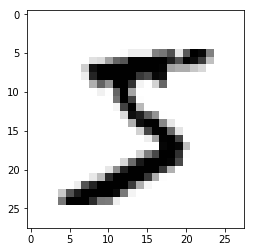

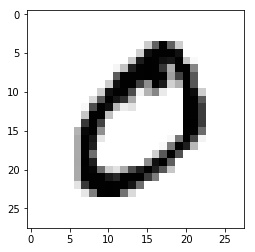

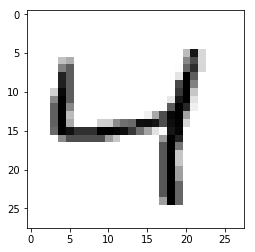

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def seek_image(k):

    toread = "data/MNIST/train-images-idx3-ubyte"

    f_bin = open(toread, mode="rb")

    n = 60000 # (anticipated) number of images.
    d = 28*28 # number of entries (int values) per image.
    times_todo = 5 # number of images to view.
    bytes_left = d
    data_x = np.zeros((d,), dtype=np.uint8) # initialize.
    idx = 0
    
    f_bin.seek(4*4 + d*k)

    while idx < bytes_left:
        b = f_bin.read(1)
        data_x[idx] = int.from_bytes(b, byteorder="big", signed=False)
        idx += 1
    img_x = data_x.reshape((28,28))
    plt.imshow(img_x, cmap=plt.cm.binary)
    plt.show()

    f_bin.close()

seek_image(0)
seek_image(1)
seek_image(2)

## 練習問題 (C)

### C-1, C-2

In [13]:
def save_images(is_train):
    toread = "data/MNIST/train-images-idx3-ubyte" if is_train else "data/MNIST/t10k-images-idx3-ubyte"

    n = 60000 if is_train else 10000
    d = 28*28
    bytes_left = n * d
    data_X = np.empty((n*d,), dtype=np.uint8)

    with open(toread, mode="rb") as f_bin:

        f_bin.seek(16) # go to start of images.
        idx = 0

        print("Reading binary file...", end=" ")
        while bytes_left > 0:
            b = f_bin.read(1)
            data_X[idx] = int.from_bytes(b, byteorder="big", signed=False)
            bytes_left -= 1
            idx += 1
        print("Done reading...", end=" ")
    print("OK, file closed.")

    print("Min:", np.min(data_X))
    print("Mean:", np.mean(data_X))
    print("Median:", np.median(data_X))
    print("Max:", np.max(data_X))
    print("StdDev:", np.std(data_X))

    data_X_float = np.empty(data_X.shape, dtype=np.float32)
    data_X_float = np.float32((data_X - np.min(data_X))/(np.max(data_X) - np.min(data_X)))

    print("Min:", np.min(data_X_float))
    print("Mean:", np.mean(data_X_float))
    print("Median:", np.median(data_X_float))
    print("Max:", np.max(data_X_float))
    print("StdDev:", np.std(data_X_float))
    
    print("Writing binary file...", end=" ")
    towrite = "data/MNIST/X_tr.dat" if is_train else "data/MNIST/X_te.dat"
    with open(towrite, mode="bw") as g_bin:
        data_X_float.tofile(g_bin) # don't forget the dtype used.
    print("OK.")
    
    with open(towrite, mode="br") as g_bin:
        data_X_check = np.fromfile(g_bin, dtype=np.float32)
    print("OK.")

    print("Shapes:", data_X_check.shape, data_X_float.shape)
    print("Difference =", np.linalg.norm(data_X_check-data_X_float))

save_images(is_train=False)

Reading binary file... Done reading... OK, file closed.
Min: 0
Mean: 33.7912244898
Median: 0.0
Max: 255
StdDev: 79.1724632223
Min: 0.0
Mean: 0.132515
Median: 0.0
Max: 1.0
StdDev: 0.31048
Writing binary file... OK.
OK.
Shapes: (7840000,) (7840000,)
Difference = 0.0


Reading binary file... Done reading... OK, file closed.
Min: 0
Mean: 4.4434
Median: 4.0
Max: 9
StdDev: 2.89572036633
Bin counts:
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


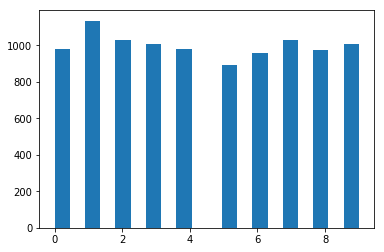

Writing binary file... OK.
OK.
Shapes: (10000,) (10000,)
Difference = 0.0


In [24]:
def save_labels(is_train):

    toread = "data/MNIST/train-labels-idx1-ubyte" if is_train else "data/MNIST/t10k-labels-idx1-ubyte"

    n = 60000 if is_train else 10000
    bytes_left = n
    data_y = np.empty((n,), dtype=np.uint8)

    with open(toread, mode="rb") as f_bin:

        f_bin.seek(8) # go to start of the labels.
        idx = 0

        print("Reading binary file...", end=" ")
        while bytes_left > 0:
            b = f_bin.read(1)
            data_y[idx] = int.from_bytes(b, byteorder="big", signed=False)
            bytes_left -= 1
            idx += 1
        print("Done reading...", end=" ")
    print("OK, file closed.")
    
    print("Min:", np.min(data_y))
    print("Mean:", np.mean(data_y))
    print("Median:", np.median(data_y))
    print("Max:", np.max(data_y))
    print("StdDev:", np.std(data_y))

    print("Bin counts:")
    print(np.bincount(data_y))

    plt.hist(np.hstack(data_y), bins='auto')
    
    '''
        ヒストグラムを保存する
    '''
    tosave = "./output/y_tr.png" if is_train else "./output/y_te.png"
    plt.savefig(tosave)
    plt.show()
    
    print("Writing binary file...", end=" ")
    towrite = "data/MNIST/y_tr.dat" if is_train else "data/MNIST/y_te.dat"
    with open(towrite, mode="bw") as g_bin:
        data_y.tofile(g_bin) # don't forget the dtype used.
    print("OK.")
    
    with open(towrite, mode="br") as g_bin:
        data_y_check = np.fromfile(g_bin, dtype=np.uint8)
    print("OK.")

    print("Shapes:", data_y_check.shape, data_y.shape)
    print("Difference =", np.linalg.norm(data_y_check-data_y))
    
save_labels(is_train=False)


訓練用データと評価用データでヒストグラムにばらつきはなかった。  
頻度が多いのは１、低いのは５。

### C-2